# **GRADUATE ADMISSIONS**

***
## CONTENTS
>1. 서론
2. 라이브러리 로드
3. 데이터 적재
4. 탐색적 데이터 분석 (EDA)
5. 특성공학
6. 지도학습 알고리즘을 활용한 회귀 모델링
7. 결론

***
## 1. 서론

> 전략적인 대학원 지원을 위해 대학원의 입학 가능 확률을 아는 것은 매우 중요하다. <br>
본 커널의 목적은 ‘GRE Score’, ‘TOEFL Score’, ‘CGPA’, ‘University Rating’, ‘SOP’, ‘LOR’, ‘Research’ 의 7 항목을 토대로 ‘Chance of Admit’을 모델링 하는 것이다. <br> 지도학습 머신러닝 알고리즘 중 선형 회귀, 랜덤 포레스트 회귀 등을 사용하여 모델링을 진행하였다. <br>
데이터 셋은 [Kaggle Dataset ‘Graduate-admissions’](https://www.kaggle.com/mohansacharya/graduate-admissions/home) 에서 수집 가능하다. 



***
## 2. 라이브러리 로드

> 데이터 분석에 사용할 라이브러리를 로드한다.

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


***
## 3. 데이터 적재
> 데이터를 로드한다.

In [4]:
rawdata = pd.read_csv('Admission_Predict_Ver1.1.csv')
rawdata = rawdata.set_index('Serial No.')

***
## 4. 탐색적 데이터 분석 (EDA)
> 탐색적 데이터 분석을 진행한다. 전체 데이터의 기본 정보, 변수 간 관계 및 각 변수의 정보를 탐색하도록 한다.

### 4.1 general information
> 전체 데이터의 기본정보를 통해 데이터의 결측값 유무, 변수의 유형, 변수 타입을 확인하고 독립변수 (feature/ independent variable)와 종속변수 (dependent variable) 를 정의한다. <br> 또한 pairplot 및 correlation plot을 통해 변수 간 분포 확인과 상관정도를 확인한다.


In [5]:
rawdata.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


> **총 8개의 열**이 있음을 알 수 있다.

In [6]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


> **총 500행의 데이터**가 있고 **결측값은 없다**.<br><br>

> 데이터 타입
>- **int 타입** :'GRE Score', 'TOEFL Score', 'University Rating', 'Research'
- **float의 타입** : 'SOP', 'LOR', 'CGPS', 'Chance of Admit'

In [7]:
rawdata.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<Figure size 360x360 with 0 Axes>

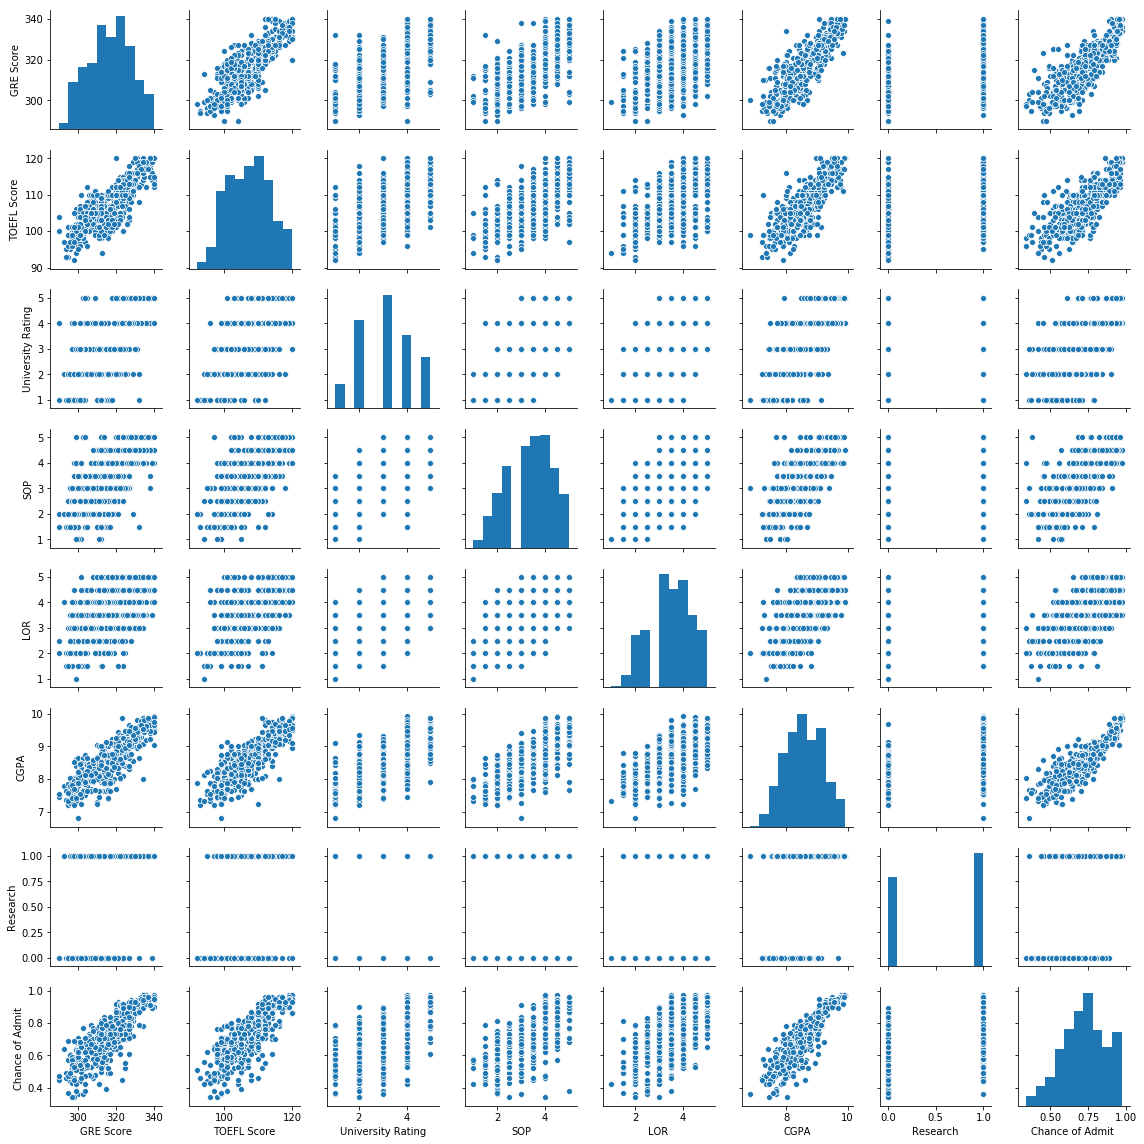

In [8]:
#pd.plotting.scatter_matrix(rawdata, figsize = (15,15), hist_kwds={'bins':15})
plt.figure(figsize=(5,5))
sns.pairplot(rawdata, height= 2, diag_kws={'bins':10})
plt.show()

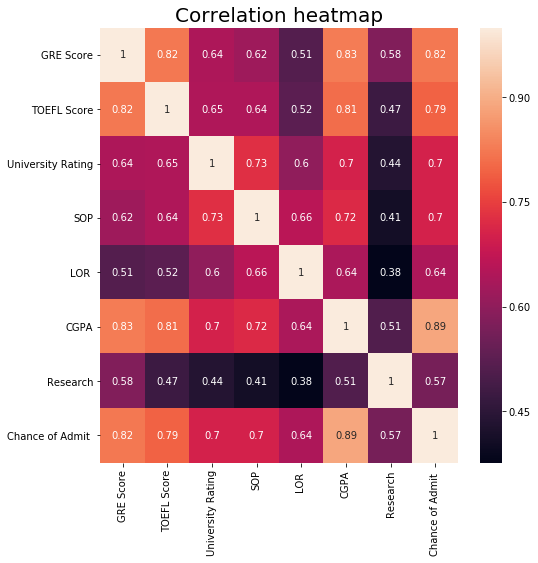

In [9]:
# correlation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(rawdata.corr('spearman'), annot=True).set_title('Correlation heatmap', size=20) 
# 이산형 변수가 있기 때문에 spearman rank correlation coefficient로 계산
plt.show()

> pair plot과 correlation plot을 통해 각 변수들이 **서로 어느정도의 선형성을 가짐**을 확인 할 수 있다. <br><br>

> 변수 유형
>- **연속형**: 'GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit'
- **이산형**: 'University Rating', 'SOP', 'LOR', 'Research' <br><br>

> IV/DV 정의
>- **Independent variable (feature)** : 'GRE Score', 'TOEFL Score', 'CGPA','University Rating', 'SOP', 'LOR', 'Research'
- **Dependent variable** : 'Chance of Admit'

### 4.2 IV 탐색 

> 여러가지 시각화 기법을 통해 각 변수의 정규성, outlier의 유무와 skewness를 확인한다. 

#### 4.2.1 GRE Score

In [10]:
GRE = rawdata['GRE Score']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


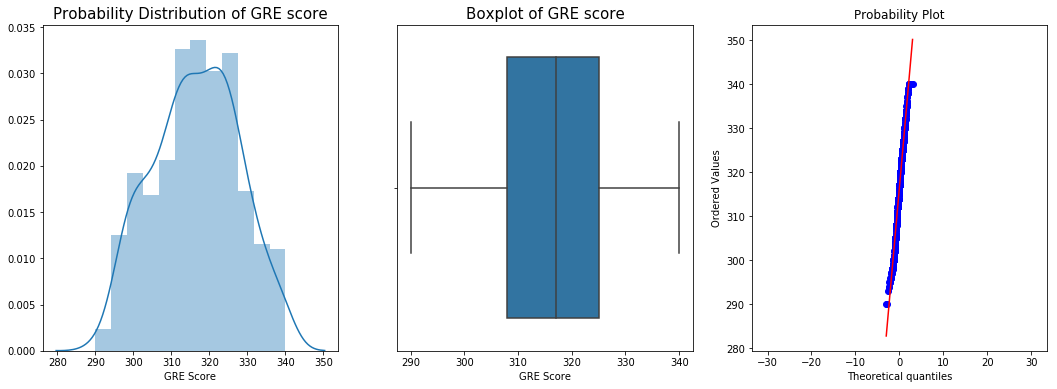

In [11]:
plt.figure(figsize=(18,6))

# probability Distribution 
plt.subplot(1,3,1)
sns.distplot(GRE).set_title('Probability Distribution of GRE score',size = 15)

# violin plot (boxplot)
plt.subplot(1,3,2)
#sns.violinplot(GRE).set_title('violinplot of GRE score',size = 15)
sns.boxplot(GRE).set_title('Boxplot of GRE score',size = 15)

# Q-Q plot
probplot(GRE, plot = plt.subplot(1,3,3))
plt.axis('equal')

plt.show()

> Boxplot을 통해 아웃라이어가 없으며, Q-Q plot을 통해 'GRE Score'가 정규성을 보이는 것을 확인 할 수 있다. 

#### 4.2.2 TOEFL Score

In [12]:
TFL = rawdata['TOEFL Score']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


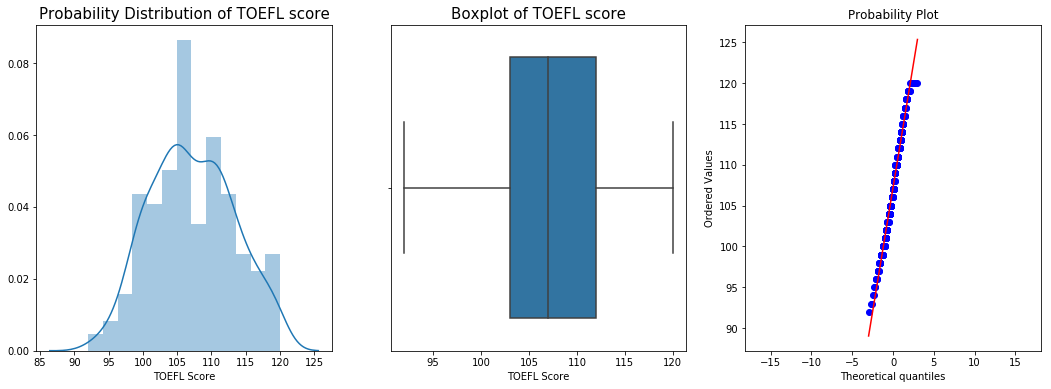

In [13]:
plt.figure(figsize=(18,6))

# probability Distribution 
plt.subplot(1,3,1)
sns.distplot(TFL).set_title('Probability Distribution of TOEFL score',size = 15)

# violin plot (boxplot)
plt.subplot(1,3,2)
#sns.violinplot(TFL).set_title('violinplot of TOEFL score',size = 15)
sns.boxplot(TFL).set_title('Boxplot of TOEFL score',size = 15)

# Q-Q plot
probplot(TFL, plot = plt.subplot(1,3,3))
plt.axis('equal')

plt.show()

> Boxplot을 통해 아웃라이어가 없으며, Q-Q plot을 통해 'TOEFL Score'가 정규성을 보이는 것을 확인 할 수 있다. 

#### 4.2.3 CGPA

In [14]:
CGPA = rawdata['CGPA']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


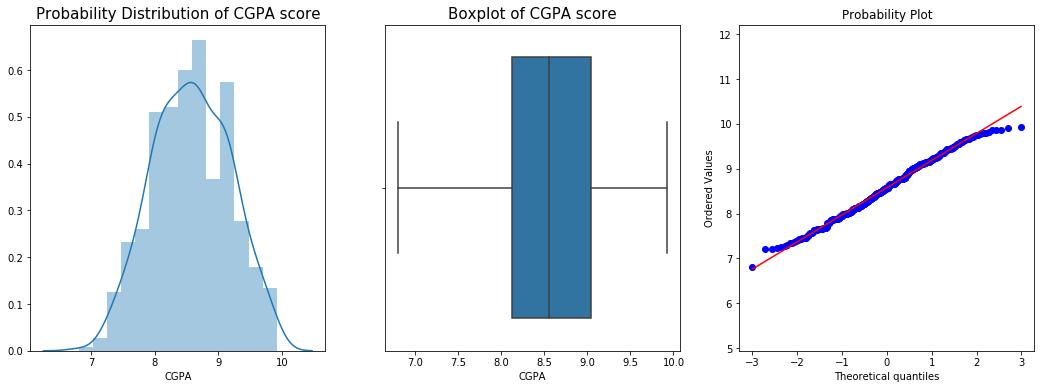

In [15]:
plt.figure(figsize=(18,6))

# probability Distribution 
plt.subplot(1,3,1)
sns.distplot(CGPA).set_title('Probability Distribution of CGPA score',size = 15)

# violin plot (boxplot)
plt.subplot(1,3,2)
#sns.violinplot(CGPA).set_title('violinplot of CGPA score',size = 15)
sns.boxplot(CGPA).set_title('Boxplot of CGPA score',size = 15)

# Q-Q plot
probplot(CGPA, plot = plt.subplot(1,3,3))
plt.axis('equal')

plt.show()

> Boxplot을 통해 아웃라이어가 없으며, Q-Q plot을 통해 'CGPA'가 정규성을 보이는 것을 확인 할 수 있다. 

#### 4.2.4 Discrete varibales (University Rating, SOP, LOR, Research)

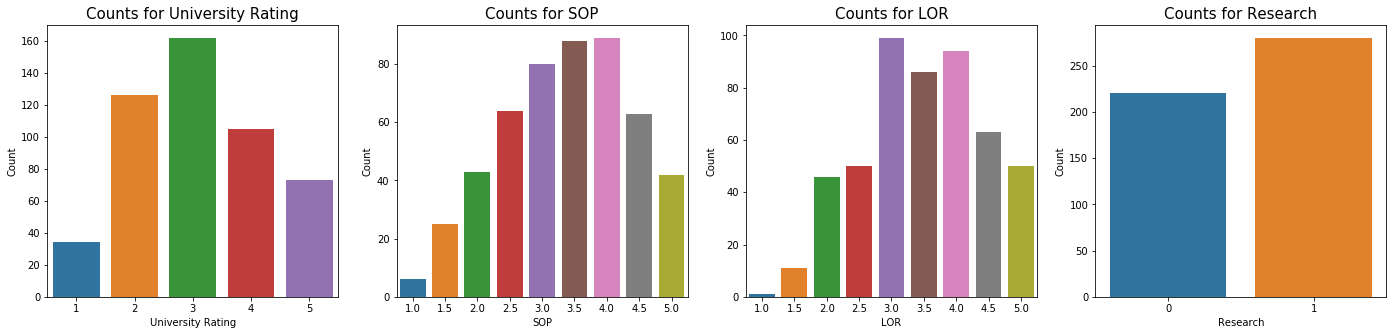

In [16]:
plt.figure(figsize=(24,5))

# University Rating
UNR = pd.DataFrame(rawdata['University Rating'].value_counts())
UNR.columns = ['Count']
UNR.index.name = 'University Rating'
plt.subplot(1,4,1)
sns.barplot(x = UNR.index, y = UNR['Count']).set_title('Counts for University Rating', size =15)

# SOP (Statement of Purpose)
SOP = pd.DataFrame(rawdata['SOP'].value_counts())
SOP.columns = ['Count']
SOP.index.name = 'SOP'
plt.subplot(1,4,2)
sns.barplot(x = SOP.index, y = SOP['Count']).set_title('Counts for SOP', size = 15)

# LOR (Letter of Recommendation)
LOR = pd.DataFrame(rawdata['LOR '].value_counts())
LOR.columns = ['Count']
LOR.index.name = 'LOR'
plt.subplot(1,4,3)
sns.barplot(x = LOR.index, y = LOR['Count']).set_title('Counts for LOR', size = 15)

# Research
RSC = pd.DataFrame(rawdata['Research'].value_counts())
RSC.columns = ['Count']
RSC.index.name = 'Research'
plt.subplot(1,4,4)
sns.barplot(x = RSC.index, y = RSC['Count']).set_title('Counts for Research', size = 15)

plt.show()

### 4.3 DV 탐색
> DV, DV와 타 변수와의 관계 등을 탐색한다. 

#### 4.3.1 Chance of Admit

In [17]:
CAD = rawdata['Chance of Admit ']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


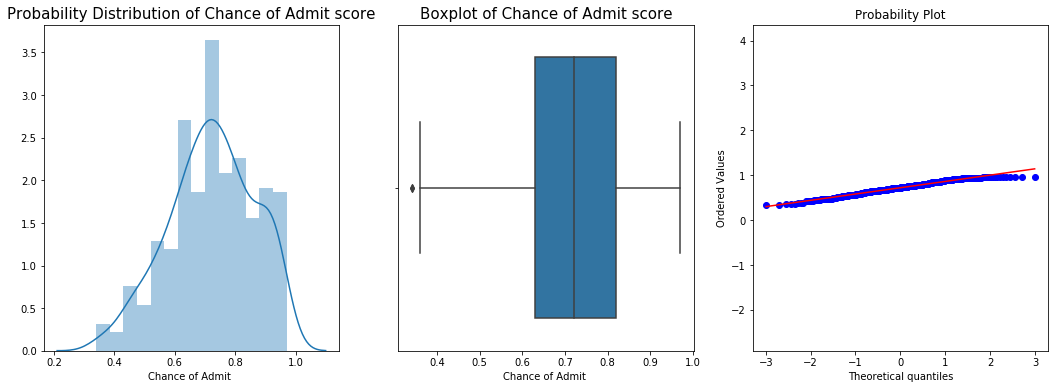

In [18]:
plt.figure(figsize=(18,6))

# probability Distribution 
plt.subplot(1,3,1)
sns.distplot(CAD).set_title('Probability Distribution of Chance of Admit score',size = 15)

# violin plot (boxplot)
plt.subplot(1,3,2)
#sns.violinplot(CAD).set_title('violinplot of Chance of Admit score',size = 15)
sns.boxplot(CAD).set_title('Boxplot of Chance of Admit score',size = 15)

# Q-Q plot
probplot(CAD, plot = plt.subplot(1,3,3))
plt.axis('equal')

plt.show()

> Boxplot을 통해 발견된 아웃라이어를 제거하도록 한다.

In [19]:
rawdata.sort_values('Chance of Admit ', ascending= True).head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
93,298,98,2,4.0,3.0,8.03,0,0.34
377,297,96,2,2.5,2.0,7.43,0,0.34
95,303,99,3,2.0,2.5,7.66,0,0.36
59,300,99,1,3.0,2.0,6.80,1,0.36
458,295,99,1,2.0,1.5,7.57,0,0.37


In [20]:
data_rm_outlier = rawdata.copy().sort_values('Chance of Admit ', ascending= True).drop(93,0).drop(377,0)

In [21]:
CAD2 = data_rm_outlier['Chance of Admit ']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


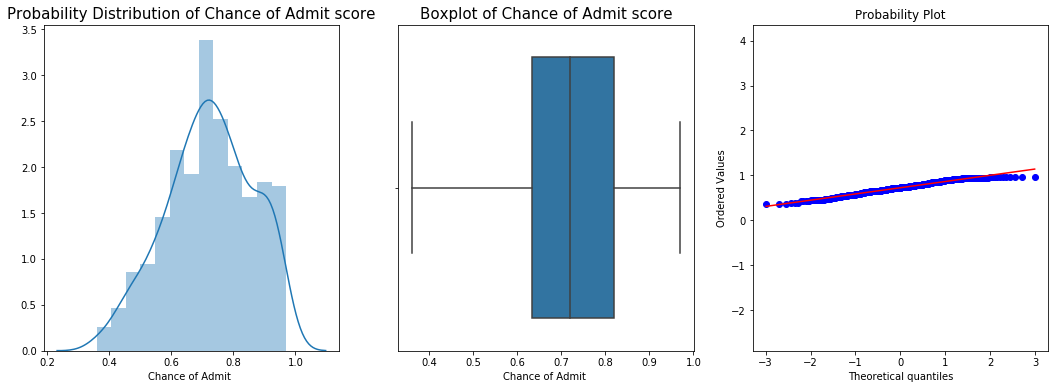

In [22]:
plt.figure(figsize=(18,6))

# probability Distribution 
plt.subplot(1,3,1)
sns.distplot(CAD2).set_title('Probability Distribution of Chance of Admit score',size = 15)

# violin plot (boxplot)
plt.subplot(1,3,2)
#sns.violinplot(CAD2).set_title('violinplot of Chance of Admit score',size = 15)
sns.boxplot(CAD2).set_title('Boxplot of Chance of Admit score',size = 15)

# Q-Q plot
probplot(CAD2, plot = plt.subplot(1,3,3))
plt.axis('equal')

plt.show()

> outlier가 제거 되었음을 볼 수 있다.

#### 4.3.2 Correlation Coefficient

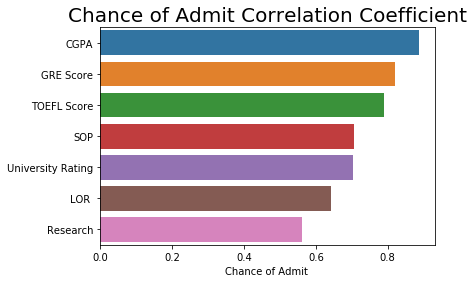

In [23]:
CAD_corr = pd.DataFrame(data_rm_outlier.corr('spearman')['Chance of Admit '].drop('Chance of Admit ', axis=0)).sort_values(by='Chance of Admit ', ascending = False)
sns.barplot(y = CAD_corr.index, x = CAD_corr['Chance of Admit ']).set_title('Chance of Admit Correlation Coefficient', size =20)

plt.show()

#### 4.3.3 Chance of Admit ~ University Rating

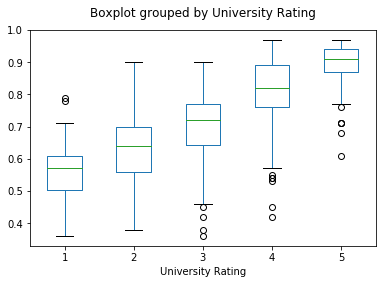

In [24]:
data_rm_outlier.boxplot(column = 'Chance of Admit ', by='University Rating' , grid = False).set_title(' ')
plt.show()

In [25]:
# ANOVA 
df = data_rm_outlier.copy()[['University Rating', 'Chance of Admit ']]
df.columns = ['UNR', 'CAD']
model = ols('CAD ~ C(UNR)', df).fit()
print(anova_lm(model))

             df    sum_sq   mean_sq           F        PR(>F)
C(UNR)      4.0  4.640282  1.160070  114.212006  7.457723e-69
Residual  493.0  5.007483  0.010157         NaN           NaN


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  1      2     0.0687  0.0152 0.1221  True 
  1      3     0.1408  0.0888 0.1929  True 
  1      4     0.2396  0.1851 0.294   True 
  1      5     0.326   0.2687 0.3833  True 
  2      3     0.0722  0.0393 0.1051  True 
  2      4     0.1709  0.1343 0.2075  True 
  2      5     0.2574  0.2166 0.2981  True 
  3      4     0.0987  0.0641 0.1333  True 
  3      5     0.1852  0.1463 0.2241  True 
  4      5     0.0865  0.0444 0.1285  True 
-------------------------------------------


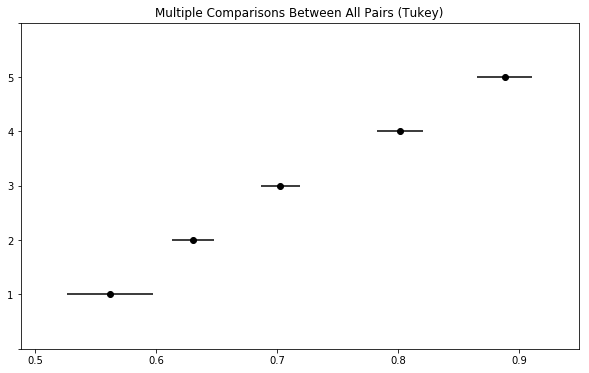

In [26]:
posthoc = pairwise_tukeyhsd(df['CAD'],df['UNR'], alpha = 0.05)
print(posthoc)
fig = posthoc.plot_simultaneous()

> ANOVA분석을 통해 **University Rating 간에 Chance of Admit의 유의한 차이가 있음**을 확인하였고, tukey posthoc test를 통해 **모든 University Rating 그룹 간 차이가 있음**을 알 수 있다. <br>
**Grouping: 1(A) / 2(B) / 3(C) / 4(D) / 5(E)**

#### 4.3.4 Chance of Admit ~ SOP

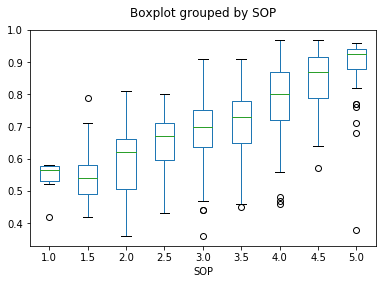

In [27]:
data_rm_outlier.boxplot(column = 'Chance of Admit ', by='SOP', grid = False).set_title(' ')
plt.show()

In [28]:
# ANOVA 
df = data_rm_outlier.copy()[['SOP', 'Chance of Admit ']]
df.columns = ['SOP', 'CAD']
model = ols('CAD ~ C(SOP)', df).fit()
print(anova_lm(model))

             df    sum_sq   mean_sq          F        PR(>F)
C(SOP)      8.0  4.741825  0.592728  59.080225  4.640949e-67
Residual  489.0  4.905940  0.010033        NaN           NaN


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 1.0    1.5    0.0081  -0.1338 0.1499 False 
 1.0    2.0    0.0512  -0.0848 0.1872 False 
 1.0    2.5    0.1118  -0.0215 0.2452 False 
 1.0    3.0    0.1402   0.0081 0.2723  True 
 1.0    3.5    0.1737   0.042  0.3054  True 
 1.0    4.0    0.2495   0.1178 0.3812  True 
 1.0    4.5    0.3117   0.1783 0.445   True 
 1.0    5.0    0.3467   0.2105 0.4829  True 
 1.5    2.0    0.0431  -0.0354 0.1216 False 
 1.5    2.5    0.1038    0.03  0.1775  True 
 1.5    3.0    0.1321   0.0606 0.2036  True 
 1.5    3.5    0.1656   0.0949 0.2364  True 
 1.5    4.0    0.2414   0.1707 0.3122  True 
 1.5    4.5    0.3036   0.2298 0.3774  True 
 1.5    5.0    0.3386   0.2598 0.4174  True 
 2.0    2.5    0.0606  -0.0011 0.1224 False 
 2.0    3.0    0.089     0.03  0.148   True 
 2.0    3.5    0.1225   0.0644 0.1806  True 
 2.0    4.0    0.1983   0.1402 0.2564  True 
 2.0

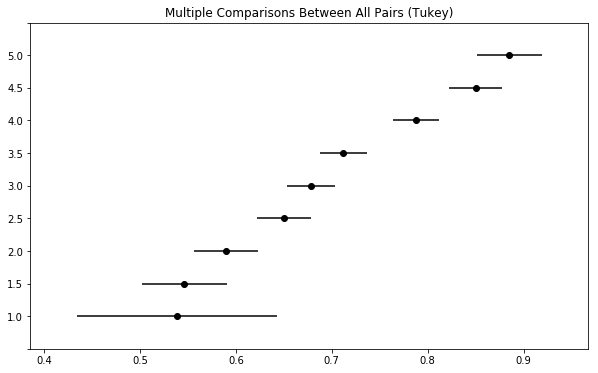

In [29]:
posthoc = pairwise_tukeyhsd(df['CAD'],df['SOP'], alpha = 0.05)
print(posthoc)
fig = posthoc.plot_simultaneous()

> ANOVA분석을 통해 **SOP 점수 간에 Chance of Admit의 유의한 차이가 있음**을 확인하였고, tukey posthoc test를 통해 차이가 있는 그룹을 확인할 수 있다. <br>
**Grouping: 1(A) / 1.5 (A) / 2(A) / 2.5(AB) / 3 (B) / 3.5 (BC) / 4 (D) / 4.5(E) / 5(E)**

#### 4.3.5 Chance of Admit ~ LOR

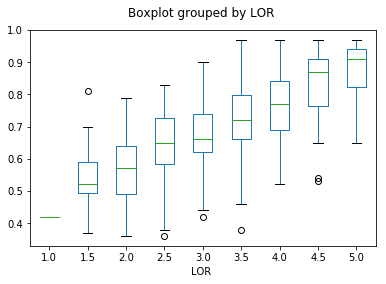

In [30]:
data_rm_outlier.boxplot(column = 'Chance of Admit ', by='LOR ' , grid = False).set_title(' ')
plt.show()

In [31]:
# ANOVA 
df = data_rm_outlier.copy()[['LOR ', 'Chance of Admit ']]
df.columns = ['LOR', 'CAD']
model = ols('CAD ~ C(LOR)', df).fit()
print(anova_lm(model))

             df    sum_sq   mean_sq          F        PR(>F)
C(LOR)      8.0  4.050384  0.506298  44.231355  2.909504e-53
Residual  489.0  5.597381  0.011447        NaN           NaN


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 1.0    1.5     0.13   -0.2182 0.4782 False 
 1.0    2.0    0.1533  -0.1837 0.4904 False 
 1.0    2.5    0.2206  -0.1161 0.5573 False 
 1.0    3.0    0.2518  -0.0832 0.5869 False 
 1.0    3.5    0.303   -0.0323 0.6383 False 
 1.0    4.0    0.3441   0.009  0.6793  True 
 1.0    4.5    0.4119   0.0759 0.7479  True 
 1.0    5.0    0.4526   0.1159 0.7893  True 
 1.5    2.0    0.0233  -0.0888 0.1355 False 
 1.5    2.5    0.0906  -0.0204 0.2016 False 
 1.5    3.0    0.1218   0.0158 0.2278  True 
 1.5    3.5    0.173    0.0663 0.2798  True 
 1.5    4.0    0.2141   0.1079 0.3204  True 
 1.5    4.5    0.2819   0.173  0.3908  True 
 1.5    5.0    0.3226   0.2116 0.4336  True 
 2.0    2.5    0.0673  -0.0012 0.1358 False 
 2.0    3.0    0.0985   0.0385 0.1585  True 
 2.0    3.5    0.1497   0.0884 0.211   True 
 2.0    4.0    0.1908   0.1304 0.2512  True 
 2.0

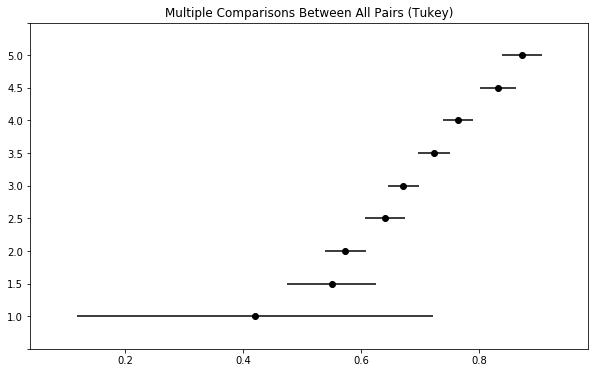

In [32]:
posthoc = pairwise_tukeyhsd(df['CAD'],df['LOR'], alpha = 0.05)
print(posthoc)
fig = posthoc.plot_simultaneous()

>ANOVA분석을 통해 **LOR 점수 간 Chance of Admit의 유의한 차이가 있음**을 확인하였고, tukey posthoc test를 통해 차이가 있는 그룹을 확인할 수 있다. <br>
**Grouping : 1(ABCD) / 1.5 (AB) / 2(AB) / 2.5(ABC) / 3 (AC) / 3.5 (ADE) / 4 (E) / 4.5(F) / 5(F)**

#### 4.3.6 Chance of Admit ~ Research

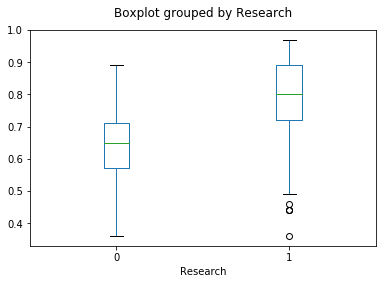

In [33]:
data_rm_outlier.boxplot(column = 'Chance of Admit ', by='Research' , grid = False).set_title(' ')
plt.show()

In [34]:
# ANOVA 
df = data_rm_outlier.copy()[['Research', 'Chance of Admit ']]
df.columns = ['RSC', 'CAD']
model = ols('CAD ~ C(RSC)', df).fit()
print(anova_lm(model))

             df    sum_sq   mean_sq           F        PR(>F)
C(RSC)      1.0  2.844906  2.844906  207.423542  1.537317e-39
Residual  496.0  6.802859  0.013715         NaN           NaN


> ANOVA분석을 통해 **Research 유무 간 Chance of Admit의 유의한 차이가 있음**을 확인하였다.

***
## 5. 특성공학
> 특성공학을 통해 모델링에 사용될 변수의 추가/삭제/변환 등의 과정을 진행한다.

In [35]:
y = data_rm_outlier.copy()['Chance of Admit ']
X = data_rm_outlier.copy().drop('Chance of Admit ', axis=1)

### 5.1  feature importance 계산 (Random forest/ XGBoost)

In [36]:
#Random forest
forest_reg = RandomForestRegressor(n_estimators=100, random_state=902)
forest_reg.fit(X, y)
pd.DataFrame({'feature importance' : forest_reg.feature_importances_}).set_index(rawdata.drop('Chance of Admit ', axis=1).columns).sort_values('feature importance', ascending=False)

,feature importance
CGPA,0.821265
GRE Score,0.071246
TOEFL Score,0.035403
LOR,0.023865
SOP,0.023238
University Rating,0.013505
Research,0.011478


In [37]:
#XGBoost
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X, y)
pd.DataFrame({'feature importance' : xgb.feature_importances_}).set_index(rawdata.copy().drop('Chance of Admit ', axis=1).columns).sort_values('feature importance', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


,feature importance
CGPA,0.611807
GRE Score,0.164597
Research,0.053707
TOEFL Score,0.052273
LOR,0.050290
SOP,0.041298
University Rating,0.026028


> 종합적으로 **CGPA와 GRE Score가 상대적으로 중요한 변수임**을 알 수 있다. 반면, **University Rating은 중요도가 높지 않은 변수**임을 알 수 있다.

### 5.2 예측 변수 제거

In [38]:
X1 = X.copy().drop('University Rating', axis=1)

> University Rating이 크게 중요하지 않은 변수임을 확인하였고, 많은 변수는 모델의 복잡도를 높일 수 있기 때문에 삭제한다.

### 5.3 변수 추가

#### 5.3.1 상호작용항 추가

In [39]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X1)

#### 5.3.2 연속형 변수 구간화
> **Posthoc test의 결과**를 이용해 **SOP 및 LOR을 구간화한다.**

In [42]:
def SOP_binning(df):
    SOP_G = []
    for i in range(len(df)):
        if np.array(df['SOP'])[i] == 2.5:
            SOP_G.append(1)
        elif np.array(df['SOP'])[i] == 3:
            SOP_G.append(2)
        elif np.array(df['SOP'])[i] == 3.5:
            SOP_G.append(3)
        elif np.array(df['SOP'])[i] == 4:
            SOP_G.append(4)
        elif np.array(df['SOP'])[i] == 4.5:
            SOP_G.append(5)
        elif np.array(df['SOP'])[i] == 5:
            SOP_G.append(5)
        else:
            SOP_G.append(0)
    df['SOP_G'] = pd.DataFrame(SOP_G).set_index(df.index)

In [43]:
SOP_binning(X1)

In [44]:
def LOR_binning(df):
    LOR_G = []
    for i in range(len(df)):
        if np.array(df['LOR '])[i] == 1:
            LOR_G.append(0)
        elif np.array(df['LOR '])[i] == 1.5:
            LOR_G.append(1)
        elif np.array(df['LOR '])[i] == 2:
            LOR_G.append(1)
        elif np.array(df['LOR '])[i] == 2.5:
            LOR_G.append(2)
        elif np.array(df['LOR '])[i] == 3:
            LOR_G.append(3)
        elif np.array(df['LOR '])[i] == 3.5:
            LOR_G.append(4)
        elif np.array(df['LOR '])[i] == 4:
            LOR_G.append(5)
        elif np.array(df['LOR '])[i] == 4.5:
            LOR_G.append(6)
        elif np.array(df['LOR '])[i] == 5:
            LOR_G.append(6)
    df['LOR_G'] = pd.DataFrame(LOR_G).set_index(df.index)

In [45]:
LOR_binning(X1)

### 5.4 가변수 생성

In [46]:
X_dum = pd.get_dummies(X1, columns=['SOP_G','LOR_G'])

In [47]:
X_dum.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,SOP_G_0,SOP_G_1,SOP_G_2,SOP_G_3,SOP_G_4,SOP_G_5,LOR_G_0,LOR_G_1,LOR_G_2,LOR_G_3,LOR_G_4,LOR_G_5,LOR_G_6
Serial No.,,,,,,,,,,,,,,,,,,,
95,303,99,2.0,2.5,7.66,0,1,0,0,0,0,0,0,0,1,0,0,0,0
59,300,99,3.0,2.0,6.80,1,0,0,1,0,0,0,0,1,0,0,0,0,0
458,295,99,2.0,1.5,7.57,0,1,0,0,0,0,0,0,1,0,0,0,0,0
92,299,97,5.0,3.5,7.66,0,0,0,0,0,0,1,0,0,0,0,1,0,0
376,304,101,2.0,2.5,7.66,0,1,0,0,0,0,0,0,0,1,0,0,0,0


### 5.5 Data preperation
> 머신러닝을 위한 데이터 분리 작업을 진행한다. <br>
**train-validation-test** 는 6-2-2 의 비율로 나눈다. 

In [48]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_dum, y, test_size = 0.2, random_state=902)
Xp_train_val, Xp_test, y_train_val, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state=902)

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state=902)
Xp_train, Xp_val, y_train, y_val = train_test_split(Xp_train_val, y_train_val, test_size = 0.25, random_state=902)

In [50]:
print('X_train shape: ', X_train.shape, '\nX_validation shape: ', X_val.shape, '\nX_test shape: ', X_test.shape)

X_train shape:  (298, 19) 
X_validation shape:  (100, 19) 
X_test shape:  (100, 19)


In [51]:
print('Xp_train shape: ', Xp_train.shape, '\nX_validation shape: ', Xp_val.shape, '\nX_test shape: ', Xp_test.shape)

Xp_train shape:  (298, 22) 
X_validation shape:  (100, 22) 
X_test shape:  (100, 22)


### 5.6 변수 scaling

In [52]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [53]:
# 2차항 갖는 변수 스케일링 
scaler.fit(Xp_train)
X_train_poly_scaled = scaler.transform(Xp_train)
X_val_poly_scaled = scaler.transform(Xp_val)
X_test_poly_scaled = scaler.transform(Xp_test)

In [54]:
X_trainval_scaled = np.vstack((X_train_scaled, X_val_scaled))
X_trainval_poly_scaled = np.vstack((X_train_poly_scaled, X_val_poly_scaled))
y_trainval = np.vstack((np.array(y_train).reshape(y_train.shape[0],1), np.array(y_val).reshape(y_val.shape[0],1)))

---
## 6. 지도학습 알고리즘을 활용한 회귀 모델링
**그리드 서치**가 필요한 경우엔 train 셋을 통해 학습을 진행한 후, validation 셋을 사용해 하이퍼 파라미터를 조정하고, 그렇지 않은 경우엔 train-validation 셋을 사용해 학습을 진행한다. 

In [55]:
# 모델 평가에 사용할 지표 함수 생성

# adjusted r-squared function

def adj_r2(x, y, y_pred):
    from sklearn.metrics import r2_score
    r2 = r2_score(y, y_pred)
    return (1- (y.shape[0] -1)*(1-r2)/(y.shape[0]-x.shape[1]-1))

# mape function

def mean_absolute_percentage_error(y, y_pred):
    return np.mean(np.abs((np.array(y).reshape(y.shape[0],1)-np.array(y_pred))/np.array(y).reshape(y.shape[0],1))*100)

### 6.1 Linear regression

#### 6.1.1 Linear regression with binning features


In [56]:
lr1 = LinearRegression()
lr1.fit(X_trainval_scaled, y_trainval)
lr1_pred = lr1.predict(X_test_scaled)

In [57]:
lr1_r2 = r2_score(y_test, lr1_pred)
lr1_adjr2 = adj_r2(X_test_scaled, y_test, lr1_pred)
lr1_rmse = np.sqrt(mean_squared_error(y_test, lr1_pred))
#lr1_mape = mean_absolute_percentage_error(y_test, lr1_pred)
print('lr_r2: ', lr1_r2, '\nlr_adjr2: ', lr1_adjr2, '\nlr_rmse: ', lr1_rmse)#, '\nlr_mape: ', lr1_mape)

lr_r2:  0.8157950258201757 
lr_adjr2:  0.7720463444524674 
lr_rmse:  0.057794621459082346


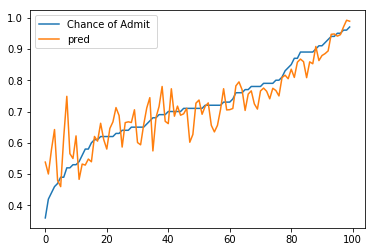

In [58]:
y_compare = pd.DataFrame(y_test)
y_compare['pred'] = lr1_pred
y_compare.sort_values(by='Chance of Admit ').reset_index().drop('Serial No.', axis=1).plot()
plt.show()

#### 6.1.2 Linear regression with interaction features

In [59]:
lr_poly = LinearRegression()
lr_poly.fit(X_trainval_poly_scaled, y_trainval)
lr_poly_pred = lr_poly.predict(X_test_poly_scaled)

In [60]:
lr_poly_r2 = r2_score(y_test, lr_poly_pred)
lr_poly_adjr2 = adj_r2(X_test_poly_scaled, y_test, lr_poly_pred)
lr_poly_rmse = np.sqrt(mean_squared_error(y_test, lr_poly_pred))
#lr_poly_mape = mean_absolute_percentage_error(y_test, lr_poly_pred)
print('lr_poly_r2: ', lr_poly_r2, '\nlr_poly_adjr2: ', lr_poly_adjr2, '\nlr_poly_rmse: ', lr_poly_rmse)#, '\nlr_poly_mape: ', lr_poly_mape)

lr_poly_r2:  0.8130941849536768 
lr_poly_adjr2:  0.7596925235118701 
lr_poly_rmse:  0.058216776354976796


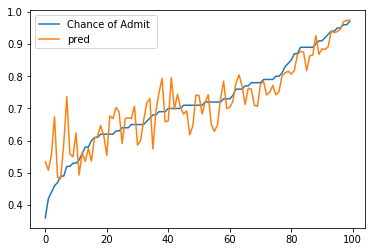

In [61]:
y_compare = pd.DataFrame(y_test)
y_compare['pred'] = lr_poly_pred
y_compare.sort_values(by='Chance of Admit ').reset_index().drop('Serial No.', axis=1).plot()
plt.show()

### 6.2 Elastic-net

#### 6.2.1 Elastic-net with binning features

In [62]:
best_score = 0 

for alpha in [0.0005, 0.001, 0.002, 0.01, 0.1, 1, 10, 100]:
    for l1_ratio in [0.0005, 0.001, 0.002, 0.01, 0.1, 1, 10, 100]:
        enet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        enet.fit(X_train_scaled, y_train)
        score = enet.score(X_val_scaled, y_val)
        if score > best_score:
            best_score = score
            best_parameter = {'alpha': alpha, 'l1_ratio': l1_ratio}
            
enet = ElasticNet(**best_parameter)
enet.fit(X_trainval_scaled, y_trainval)
enet_pred = enet.predict(X_test_scaled)
print(best_parameter)

{'alpha': 0.002, 'l1_ratio': 1}


In [63]:
enet_r2 = r2_score(y_test, enet_pred)
enet_adjr2 = adj_r2(X_test_scaled, y_test, enet_pred)
enet_rmse = np.sqrt(mean_squared_error(y_test, enet_pred))
enet_mape = mean_absolute_percentage_error(y_test, enet_pred)
print('enet_r2: ', enet_r2, '\nenet_adjr2: ', enet_adjr2, '\nenet_rmse: ', enet_rmse)#, '\nenet_mape: ', enet_mape)

enet_r2:  0.8116668015164303 
enet_adjr2:  0.7669376668765826 
enet_rmse:  0.05843865177615176


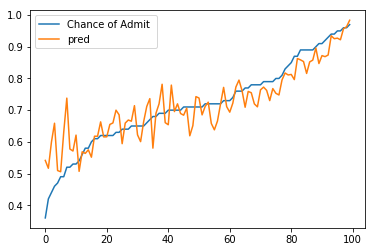

In [64]:
y_compare1 = pd.DataFrame(y_test)
y_compare1['pred'] = enet_pred
y_compare1.sort_values(by='Chance of Admit ').reset_index().drop('Serial No.', axis=1).plot()
plt.show()

#### 6.2.2 Elastic-net with interaction features

In [65]:
best_score = 0 

for alpha in [0.0005, 0.001, 0.002, 0.01, 0.1, 1, 10, 100]:
    for l1_ratio in [0.0005, 0.001, 0.002, 0.01, 0.1, 1, 10, 100]:
        enet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        enet.fit(X_train_poly_scaled, y_train)
        score = enet.score(X_val_poly_scaled, y_val)
        if score > best_score:
            best_score = score
            best_parameter = {'alpha': alpha, 'l1_ratio': l1_ratio}
            
enet = ElasticNet(**best_parameter)
enet.fit(X_trainval_poly_scaled, y_trainval)
enet_pred = enet.predict(X_test_poly_scaled)
print(best_parameter)

{'alpha': 0.001, 'l1_ratio': 1}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

In [66]:
enet_r2 = r2_score(y_test, enet_pred)
enet_adjr2 = adj_r2(X_test_poly_scaled, y_test, enet_pred)
enet_rmse = np.sqrt(mean_squared_error(y_test, enet_pred))
enet_mape = mean_absolute_percentage_error(y_test, enet_pred)
print('enet_r2: ', enet_r2, '\nenet_adjr2: ', enet_adjr2, '\nenet_rmse: ', enet_rmse)#, '\nenet_mape: ', enet_mape)

enet_r2:  0.8133621043613101 
enet_adjr2:  0.7600369913216845 
enet_rmse:  0.05817503608662109


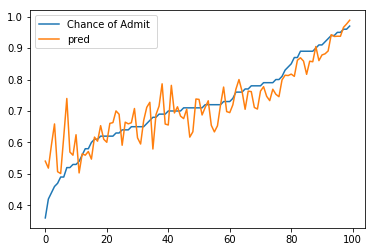

In [67]:
y_compare1 = pd.DataFrame(y_test)
y_compare1['pred'] = enet_pred
y_compare1.sort_values(by='Chance of Admit ').reset_index().drop('Serial No.', axis=1).plot()
plt.show()

### 6.3 Linear SVM regression

#### 6.3.1 Linear SVR with binning features

In [109]:
best_score = 0 

for epsilon in [0.001, 0.01, 0.1, 1, 10, 100]: #마진
    for C in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]: #규제 
        svm_reg = LinearSVR(epsilon = epsilon, C=C)
        svm_reg.fit(X_train_scaled, y_train)
        score = svm_reg.score(X_val_scaled, y_val)
        if score > best_score:
            best_score = score
            best_parameter = {'epsilon': epsilon, 'C': C}
            
svm_reg = LinearSVR(**best_parameter)
svm_reg.fit(X_trainval_scaled, y_trainval)
svm_pred = svm_reg.predict(X_test_scaled)
print(best_parameter)

{'epsilon': 0.01, 'C': 1}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [110]:
svm_r2 = r2_score(y_test, svm_pred)
svm_adjr2 = adj_r2(X_test_scaled, y_test, svm_pred)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
svm_mape = mean_absolute_percentage_error(y_test, svm_pred)
print('svm_r2: ', svm_r2, '\nsvm_adjr2: ', svm_adjr2, '\nsvm_rmse: ', svm_rmse)#, '\nsvm_mape: ', svm_mape)

svm_r2:  0.8096362704127884 
svm_adjr2:  0.7644248846358257 
svm_rmse:  0.05875283794678893


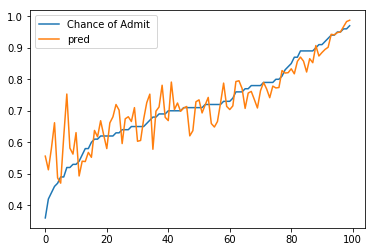

In [111]:
y_compare2 = pd.DataFrame(y_test)
y_compare2['pred'] = svm_pred
y_compare2.sort_values(by='Chance of Admit ').reset_index().drop('Serial No.', axis=1).plot()
plt.show()

#### 6.3.2 Linear SVR with interaction features

In [96]:
best_score = 0 

for epsilon in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        svm_reg = LinearSVR(epsilon = epsilon, C=C)
        svm_reg.fit(X_train_poly_scaled, y_train)
        score = svm_reg.score(X_val_poly_scaled, y_val)
        if score > best_score:
            best_score = score
            best_parameter = {'epsilon': epsilon, 'C': C}
            
svm_reg = LinearSVR(**best_parameter)
svm_reg.fit(X_trainval_poly_scaled, y_trainval)
svm_pred = svm_reg.predict(X_test_poly_scaled)
print(best_parameter)

{'epsilon': 0.01, 'C': 0.1}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
svm_r2 = r2_score(y_test, svm_pred)
svm_adjr2 = adj_r2(X_test_poly_scaled, y_test, svm_pred)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
svm_mape = mean_absolute_percentage_error(y_test, svm_pred)
print('svm_r2: ', svm_r2, '\nsvm_adjr2: ', svm_adjr2, '\nsvm_rmse: ', svm_rmse)#, '\nsvm_mape: ', svm_mape)

svm_r2:  0.806525113857953 
svm_adjr2:  0.7512465749602253 
svm_rmse:  0.0592309975130887


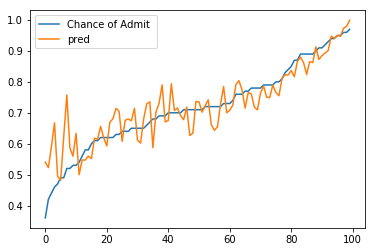

In [98]:
y_compare2 = pd.DataFrame(y_test)
y_compare2['pred'] = svm_pred
y_compare2.sort_values(by='Chance of Admit ').reset_index().drop('Serial No.', axis=1).plot()
plt.show()

### 6.4 Random forest regression

#### 6.4.1 Random forest regression with binning features

In [74]:
forest_reg = RandomForestRegressor(n_estimators=1000, random_state=902)
forest_reg.fit(X_trainval_scaled, y_trainval)
forest_pred = forest_reg.predict(X_test_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [75]:
forest_r2 = r2_score(y_test, forest_pred)
forest_adjr2 = adj_r2(X_test_scaled, y_test, forest_pred)
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_pred))
forest_mape = mean_absolute_percentage_error(y_test, forest_pred)
print('forest_r2: ', forest_r2, '\nforest_adjr2: ', forest_adjr2, '\nforest_rmse: ', forest_rmse)#, '\nforest_mape: ', forest_mape)

forest_r2:  0.8041523781844947 
forest_adjr2:  0.7576385680033122 
forest_rmse:  0.059593089045627164


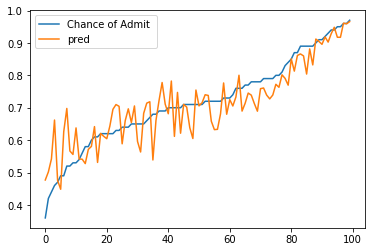

In [76]:
y_compare2 = pd.DataFrame(y_test)
y_compare2['pred'] = forest_pred
y_compare2.sort_values(by='Chance of Admit ').reset_index().drop('Serial No.', axis=1).plot()
plt.show()

#### 6.4.2 Random forest regression with interaction features

In [77]:
forest_reg = RandomForestRegressor(n_estimators=1000, random_state=902)
forest_reg.fit(X_trainval_poly_scaled, y_trainval)
forest_pred = forest_reg.predict(X_test_poly_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [78]:
forest_r2 = r2_score(y_test, forest_pred)
forest_adjr2 = adj_r2(X_test_poly_scaled, y_test, forest_pred)
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_pred))
forest_mape = mean_absolute_percentage_error(y_test, forest_pred)
print('forest_r2: ', forest_r2, '\nforest_adjr2: ', forest_adjr2, '\nforest_rmse: ', forest_rmse)#, '\nforest_mape: ', forest_mape)

forest_r2:  0.7988359145896233 
forest_adjr2:  0.74136046161523 
forest_rmse:  0.06039652760714002


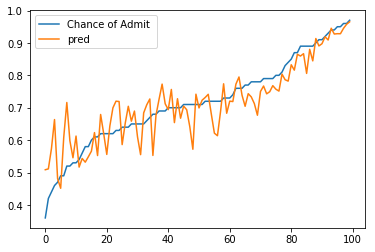

In [79]:
y_compare2 = pd.DataFrame(y_test)
y_compare2['pred'] = forest_pred
y_compare2.sort_values(by='Chance of Admit ').reset_index().drop('Serial No.', axis=1).plot()
plt.show()

---

## 7. 결론

>‘GRE Score’, ‘TOEFL Score’, ‘CGPA’, ‘University Rating’, ‘SOP’, ‘LOR’, ‘Research’ 의 7 항목으로 대학원 합격 확률 모델링을 진행해 보았다. <br>
각 변수는 대학원 합격 확률에 양의 상관관계가 있었으며, 대학원 합격에 상대적으로 영향을 많이 주는 항목은 ‘CGPA’ 와 ‘GRE Score’로 나타났다. <br>
회귀 모델링 결과를 종합해보면 다음과 같으며, adjusted R<sup>2</sup>를 기준으로 0.74 – 0.77의 값을 가짐을 확인할 수 있다. <br>

>| Regression Modeling                                | R<sup>2</sup>   | adj R<sup>2</sup> | RMSE   |
|----------------------------------------------------|-------|--------|--------|
| Linear regression with binning features            | 0.816 | 0.772  | 0.0578 |
| Linear regression with interaction features        | 0.813 | 0.760  | 0.0582 |
| Elastic-net with binning features                  | 0.812 | 0.767  | 0.0584 |
| Elastic-net with interaction features              | 0.813 | 0.760  | 0.0582 |
| Linear SVR with binning features                   | 0.810 | 0.764  | 0.0588 |
| Linear SVR with interaction features               | 0.807 | 0.751  | 0.0592 |
| Random forest regression with binning features     | 0.804 | 0.758  | 0.0596 |
| Random forest regression with interaction features | 0.799 | 0.741  | 0.0604 |

>예측 값과 실제 값을 보여주는 그래프에서 chance of admit이 0.55 미만인 경우에 예측을 거의 못하는 것을 볼 수 있다. <br>
데이터의 양이 충분히 큰 경우에는 데이터를 두 그룹으로 나누어 각각의 그룹에 대해 모델링을 진행하는 것이 모델링 성능 향상에 도움이 될 수 있다. <br>
그러나 본 데이터 셋의 경우, chance of admit 이 0.55 미만인 데이터의 수가 적어 적용하기 어렵다.<br><br>

>또한, 대학원 합격 확률을 기준으로 합격/ 불합격으로 나누어 (e.g. ‘Chance of Admit’이 0.8 이상이면 합격) 분류 분석을 수행할 수 있다. <br>
분류 분석의 경우 합격/ 불합격으로 예측하기 때문에 회귀 분석보다 더 좋은 예측 성능을 보일 것이며, 전략적인 대학원 지원에 도움을 줄 수 있을 것으로 생각된다.